In [1]:
import io
import numpy as np
from scipy import optimize
import pandas as pd
import matplotlib.pyplot as plt
import math
#%matplotlib qt
%matplotlib inline

In [2]:
def new_4(T, T1, T2, T3, a1, b1, gamma1, b2, gamma2, b3, gamma3, b4, gamma4):
    a2 = (a1 * ((T1/300)**(b1-b2))*np.exp((gamma2-gamma1)/T1))
    a3 = (a2 * ((T2/300)**(b2-b3))*np.exp((gamma3-gamma2)/T2))
    a4 = (a3 * ((T3/300)**(b3-b4))*np.exp((gamma4-gamma3)/T3))
    return np.piecewise(T, [(T <= T1), (T> T1) & (T<=T2), (T>T2) & (T<=T3), T>T3], 
                        [lambda T:(a1 * ((T/300)**b1) * np.exp(-gamma1/T)), 
                         lambda T:(a2*((T/300)**b2) * np.exp(-gamma2/T)),
                         lambda T:(a3*((T/300)**b3) * np.exp(-gamma3/T)),
                         lambda T:(a4*((T/300)**b4) * np.exp(-gamma4/T))
                        ])
def new_4_calc(T, T1, T2, T3, a1, b1, gamma1, a2, b2, gamma2, a3, b3, gamma3, a4, b4, gamma4):
    return np.piecewise(T, [(T <= T1), (T> T1) & (T<=T2), (T>T2) & (T<=T3), T>T3], 
                        [lambda T:(a1 * ((T/300)**b1) * np.exp(-gamma1/T)), 
                         lambda T:(a2*((T/300)**b2) * np.exp(-gamma2/T)),
                         lambda T:(a3*((T/300)**b3) * np.exp(-gamma3/T)),
                         lambda T:(a4*((T/300)**b4) * np.exp(-gamma4/T))
                        ])
def original(T, a_0, a_12, a_1, b_12, b_1, b_32):
    upper  = a_0 + (a_12)*(T**(1/2)) + a_1*T
    lower = T**(1/6) + (b_12)*(T**(1/2)) + (b_1)*(T) + (b_32)*(T**(3/2))
    value = upper/lower
    return value

def uncertain_list(real, measured, uncertainty):
    delta = []
    for char in range(len(real)):
        num_up = math.exp(((real[char]*(1+uncertainty))-measured[char])/measured[char])
        num_down = math.exp(((real[char]*(1-uncertainty))-measured[char])/measured[char])
        num = (abs(1-num_up) + abs(1-num_down))/2 + 1
        delta.append(num)
    return delta
        
def uncertain_parametersCH(T, f1, g1, g2, g3, g4):
    T1 = 17.4
    T2 = 169
    T3 = 4440
    f2 = f1*np.exp(g1*((1/T1)-(1/300)))/np.exp(g2*((1/T1)-(1/300)))
    f3 = f2*np.exp(g2*((1/T2)-(1/300)))/np.exp(g3*((1/T2)-(1/300)))
    f4 = f3*np.exp(g3*((1/T3)-(1/300)))/np.exp(g4*((1/T3)-(1/300)))
    return np.piecewise(T, [(T <= T1), (T> T1) & (T<=T2), (T>T2) & (T<=T3), T>T3], 
                        [lambda T:f1 * np.exp(g1*((1/T) - (1/300))), 
                         lambda T:f2 * np.exp(g2*((1/T) - (1/300))),
                         lambda T:f3 * np.exp(g3*((1/T) - (1/300))),
                         lambda T:f4 * np.exp(g4*((1/T) - (1/300)))
                        ])

def uncertain_parametersCH2(T, f1, g1, g2, g3, g4):
    T1 = 283
    T2 = 1330
    T3 = 3760
    f2 = f1*np.exp(g1*((1/T1)-(1/300)))/np.exp(g2*((1/T1)-(1/300)))
    f3 = f2*np.exp(g2*((1/T2)-(1/300)))/np.exp(g3*((1/T2)-(1/300)))
    f4 = f3*np.exp(g3*((1/T3)-(1/300)))/np.exp(g4*((1/T3)-(1/300)))
    return np.piecewise(T, [(T <= T1), (T> T1) & (T<=T2), (T>T2) & (T<=T3), T>T3], 
                        [lambda T:f1 * np.exp(g1*((1/T) - (1/300))), 
                         lambda T:f2 * np.exp(g2*((1/T) - (1/300))),
                         lambda T:f3 * np.exp(g3*((1/T) - (1/300))),
                         lambda T:f4 * np.exp(g4*((1/T) - (1/300)))
                        ])

def fnumsCH(f1, g1, g2, g3, g4):
    T1 = 17.4
    T2 = 169
    T3 = 4440
    f2 = f1*np.exp(g1*((1/T1)-(1/300)))/np.exp(g2*((1/T1)-(1/300)))
    f3 = f2*np.exp(g2*((1/T2)-(1/300)))/np.exp(g3*((1/T2)-(1/300)))
    f4 = f3*np.exp(g3*((1/T3)-(1/300)))/np.exp(g4*((1/T3)-(1/300)))
    return (f2, f3, f4)

def fnumsCH2(f1, g1, g2, g3, g4):
    T1 = 283
    T2 = 1330
    T3 = 3760
    f2 = f1*np.exp(g1*((1/T1)-(1/300)))/np.exp(g2*((1/T1)-(1/300)))
    f3 = f2*np.exp(g2*((1/T2)-(1/300)))/np.exp(g3*((1/T2)-(1/300)))
    f4 = f3*np.exp(g3*((1/T3)-(1/300)))/np.exp(g4*((1/T3)-(1/300)))
    return (f2, f3, f4)

In [3]:
temps = np.logspace(0, 4, 30000)
rates = []
for temp in temps:
    rate = original(temp, 1.0218E-09, 7.2733E-11, 5.9203E-14, 4.4914E-02, -2.6056E-04, 2.6397E-06)
    rates.append(rate)

In [4]:
guessCH = [2.04144356e+01,  1e2, 7e3,
         5.47716683e-10, -1.00876935e-01, -7.39351228e-02, 
         1.52586683e-02, -1.80139941e+00, 
         1.19522416e-01, -1.75602207e+01,
         1.52586683e-02, -1.80139941e+00, 
        ]
poptCH, pcovCH = optimize.curve_fit(new_4, temps, rates, p0 = guessCH, method="lm", maxfev=10000, ftol = 1e-10)
fit_rates4CH = []
for temp in temps:
    fit_rate4CH = new_4(temp, poptCH[0], poptCH[1], poptCH[2], poptCH[3], poptCH[4], poptCH[5], poptCH[6], poptCH[7], poptCH[8], poptCH[9], poptCH[10], poptCH[11])
    fit_rates4CH.append(fit_rate4CH)

In [5]:
#(T, T1, T2, T3, a1, b1, gamma1, a2, b2, gamma2, a3, b3, gamma3, a4, b4, gamma4):
fit_rates4CH_table = []
for temp in temps:
    fit_rate4CH = new_4_calc(temp, 17.4, 169, 4440, 5.54e-10, -9.90e-2, -7.85e-2, 6.77e-10, 9.73e-3, -1.97, 6.44e-10, 1.3e-1, -2.23e1, 1.28e-9, -5.52e-2, 8.01e2)
    fit_rates4CH_table.append(fit_rate4CH)

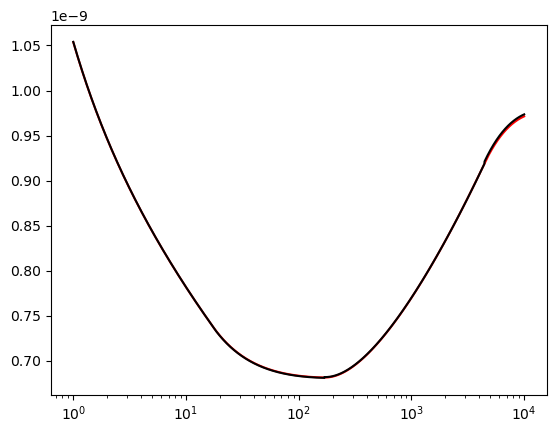

In [6]:
plt.plot(temps, fit_rates4CH, label = "fit", c = "red")
plt.plot(temps, fit_rates4CH_table, label = "fit", c = "black")
plt.xscale("log")


In [7]:
f_listCH = uncertain_list(rates, fit_rates4CH_table, .13)

In [8]:
poptCH_un, pcovCH_un = optimize.curve_fit(uncertain_parametersCH, temps, f_listCH, method="lm", maxfev=10000, ftol = 1e-10)

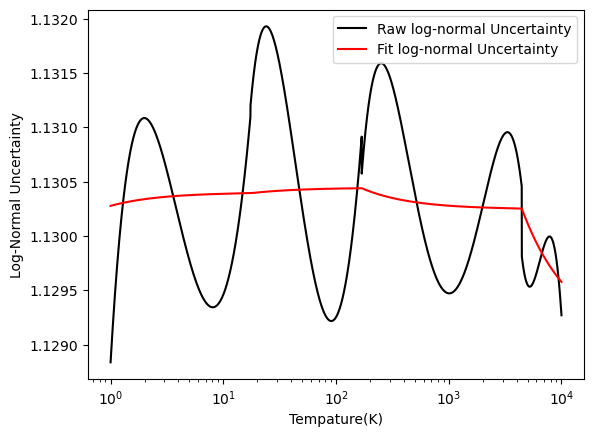

In [9]:
new_uncertain_ratesCH = []
for temp in temps:
    new_uncertain_ratesCH.append(uncertain_parametersCH(temp, poptCH_un[0] , poptCH_un[1],  poptCH_un[2],  poptCH_un[3],  poptCH_un[4]))
    
plt.plot(temps, f_listCH, c = "black", label = "Raw log-normal Uncertainty")
plt.plot(temps, new_uncertain_ratesCH, c = "red", label = "Fit log-normal Uncertainty")
plt.xscale("log")
plt.xlabel("Tempature(K)")
plt.ylabel("Log-Normal Uncertainty")
plt.legend()

In [10]:
poptCH_un

array([ 1.13039988e+00, -1.09077024e-04, -7.92857871e-04,  2.89787853e-02,
        4.77427142e+00])

In [11]:
fnumsCH(poptCH_un[0] , poptCH_un[1],  poptCH_un[2],  poptCH_un[3],  poptCH_un[4])

(1.130441726483602, 1.1303547708713586, 1.1471497900301497)

In [12]:
temps = np.logspace(0, 4, 30000)
ratesCH2 = []
for temp in temps:
    rateCH2 = original(temp, 8.5145E-10, 0, 0, 9.5666E-04, -4.4040E-05, 2.3496E-06)
    ratesCH2.append(rateCH2)

In [13]:
guessCH2 = [3.30976821e+02,  1.70433078e+03, 3e3,
         3.27204419e-10, -1.67918521e-01, 2.90123312e-03, 
         -2.36100015e-01, 3.62057162e+01, 
         -5.78378289e-01, 9.61841347e+02,
         -6.03435234e-01, 1.1286743e+02
        ]
poptCH2, pcovCH2 = optimize.curve_fit(new_4, temps, ratesCH2, p0 = guessCH2, method="lm", maxfev=10000, ftol = 1e-10)
fit_rates4CH2 = []
for temp in temps:
    fit_rate4CH2 = new_4(temp, poptCH2[0], poptCH2[1], poptCH2[2], poptCH2[3], poptCH2[4], poptCH2[5], poptCH2[6], poptCH2[7], poptCH2[8], poptCH2[9], poptCH2[10], poptCH2[11])
    fit_rates4CH2.append(fit_rate4CH2)

In [14]:
fit_rates4CH2_table = []
for temp in temps:
    fit_rate4CH2 = new_4_calc(temp, 283, 1330, 3760, 3.28e-10, -1.68e-1, 1.58e-3, 3.36e-10, -1.94e-1, 7.39, 4.71e-10, -3.3e-1, 1.89e2, 1.56e-9, -6.7e-1, 1.47e3)
    fit_rates4CH2_table.append(fit_rate4CH2)

Text(0, 0.5, 'rate_coefficent')

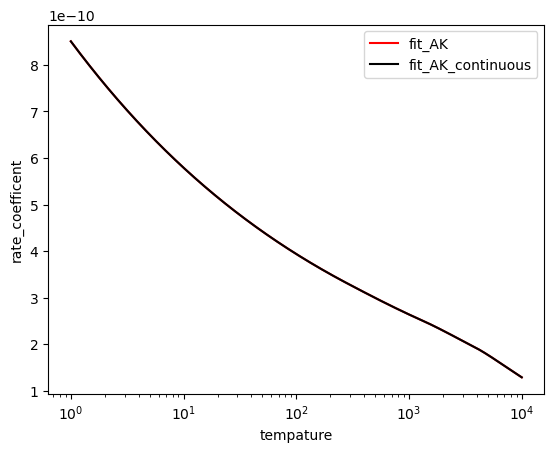

In [17]:
plt.plot(temps, fit_rates4CH2, label = "fit_AK", c = "red")
plt.plot(temps, fit_rates4CH2, label = "fit_AK_continuous", c = "black")
plt.xscale("log")
plt.legend()
plt.xlabel("tempature")
plt.ylabel("rate_coefficent")

In [171]:
f_listCH2 = uncertain_list(ratesCH2, fit_rates4CH2_table, .18)

In [172]:
poptCH2_un, pcovCH2_un = optimize.curve_fit(uncertain_parametersCH2, temps, f_listCH2, method="lm", maxfev=10000, ftol = 1e-10)

Text(0, 0.5, 'Log-Normal Uncertainty')

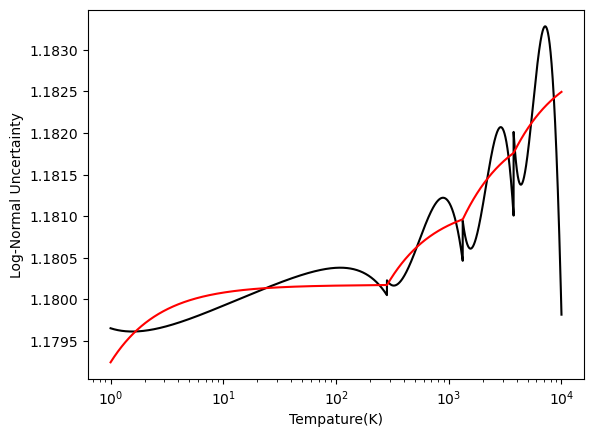

In [173]:
new_uncertain_ratesCH2 = []
for temp in temps:
    new_uncertain_ratesCH2.append(uncertain_parametersCH2(temp, poptCH2_un[0] , poptCH2_un[1],  poptCH2_un[2],  poptCH2_un[3],  poptCH2_un[4]))
    
plt.plot(temps, f_listCH2, c = "black", label = "Raw log-normal Uncertainty")
plt.plot(temps, new_uncertain_ratesCH2, c = "red", label = 'Fit Log-Normal Uncertainty')
plt.xscale("log")
plt.xlabel("Tempature(K)")
plt.ylabel("Log-Normal Uncertainty")

In [174]:
poptCH2_un

array([ 1.18017260e+00, -7.89391316e-04, -2.40493440e-01, -1.39107915e+00,
       -3.74513174e+00])

In [175]:
fnumsCH2(poptCH2_un[0] , poptCH2_un[1],  poptCH2_un[2],  poptCH2_un[3],  poptCH2_un[4])

(1.1802292470669853, 1.176728950265088, 1.1682626713603497)

Text(0, 0.5, 'rate_coefficent')

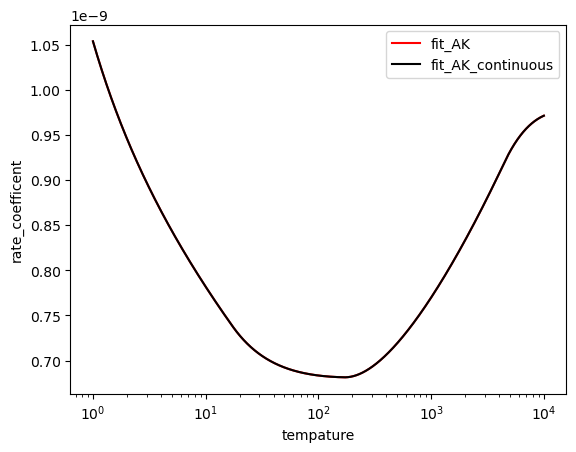

In [7]:
plt.plot(temps, fit_rates4CH, label = "fit_AK", c = "red")
plt.plot(temps, fit_rates4CH, label = "fit_AK_continuous", c = "black")
plt.xscale("log")
plt.legend()
plt.xlabel("tempature")
plt.ylabel("rate_coefficent")